# ***  CAPSTONE PROJECT OVERVIEW ***

## 1. Research Question, Data Sources, amd Data Structure Description 

       . Research Question: How accurately can we predict whether a user will make a purchase on an E-commerce website based on their browsing behavior, product interactions, and demographic information?** ###
       . Data Source: 

             - https://www.kaggle.com/datasets/kzmontage/e-commerce-website-logsLinks to an external site.
             - The dataset contains user interactions on an e-commerce website, including details about page views, product views, purchases, and user demographics.

        . Data Description and Structure: 
        
              - Features include user interactions, timestamps, product details, user demographics, and other relevant attributes.
              - The target variable is binary: "Purchase" or "No Purchase" indicating whether the user made a purchase during the session.

## 2. Analysis Steps: 

### 2.1 EDA : 
        
        . Remove columns  (ip, bytes, accessed_date, langa=uage , returned, returned_amount ) since they are are not relevant to the objective of prediction whether a purchase_made ( sales > 0) or not.
          its irrelevance to the objective of Prediction
        . Examine Variable Distributions ( Histogram for Numberical and bar Plot for Categorical Variables) 
        . Visualize Variable Relationship with pair-plot 
            
### 2.2 Data Preprocessing (For faster Computation, use data only from US): 
      
        . Since sales vs. Country is pretty uniform, for faster computing time, Use US data only
        . Convert categorical Variable into numerical values with pd.get_dummies
        . Use StandardScaler for normalization
        . Create 'Purchase_made' as the binary target from 'sales' > 0 
        . Check  if the target variale is imbalanced 

### 2.3 Feature Engineering 

        . Use PCA to reduce feature dimensionality from 11 to 5. 
        . Use RandomOverSampler to ensure trainind data is balanced, no need to balance test_set. 
        
### 2.4 Model Training 

        . Base Line Model vs. Basic LogisticRegression, KNN, Decision Tree, SVM and Classifier
        . Hyper Parameter Training with DridCV and CV for LogisticRegression, KNN, DecisionTree, SVM, and RandomForest     
        . Evaluation Metrics (precision, recall, F1 score, AUC-ROC)  and Comparison (select best model for the research question)
        
## 3. Results 

        . Search Predictive Model to classifies users into "Purchase" or "No Purchase" categories   
        . Identify key features influencing purchase decisions 
        . Enhance marketing Strategies and Improve overall conversion rate on the website.

## 4. Why is this research important? 

        . Predicting of User behavior allows e-commerce businesses to optimize marketing efforts, personalize user experiences, and increase conversion rates.
        . Understanding customer on their  purchase decision factors helps businesses  tailor their strategies, recommend relevant products, and create a more engaging online shopping experience.

## 2.1 EDA

In [1]:
import pandas as pd
#Read-in data 
df = pd.read_csv('data/E-commerce Website Logs.csv', sep = ',', low_memory = False)

In [2]:
# Info about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               99457 non-null   object 
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 19.8+ MB


In [3]:
# Create a list of columns to be removed
# remove 'accessed_date' since ojective is not time-dependent
# remove 'ip' , 'bytes' , accessed_Ffom', 'language' , 'returned', 'returned_amount' since they are not relevant for predicting purchases
# Remove "age" because it is missing lots of data
columns_to_remove = ['accessed_date', 'ip', 'bytes', 'accessed_Ffom', 'returned', 'returned_amount', 'language', 'age']

# Remove irrelevant columns
df = df.drop(columns=columns_to_remove)

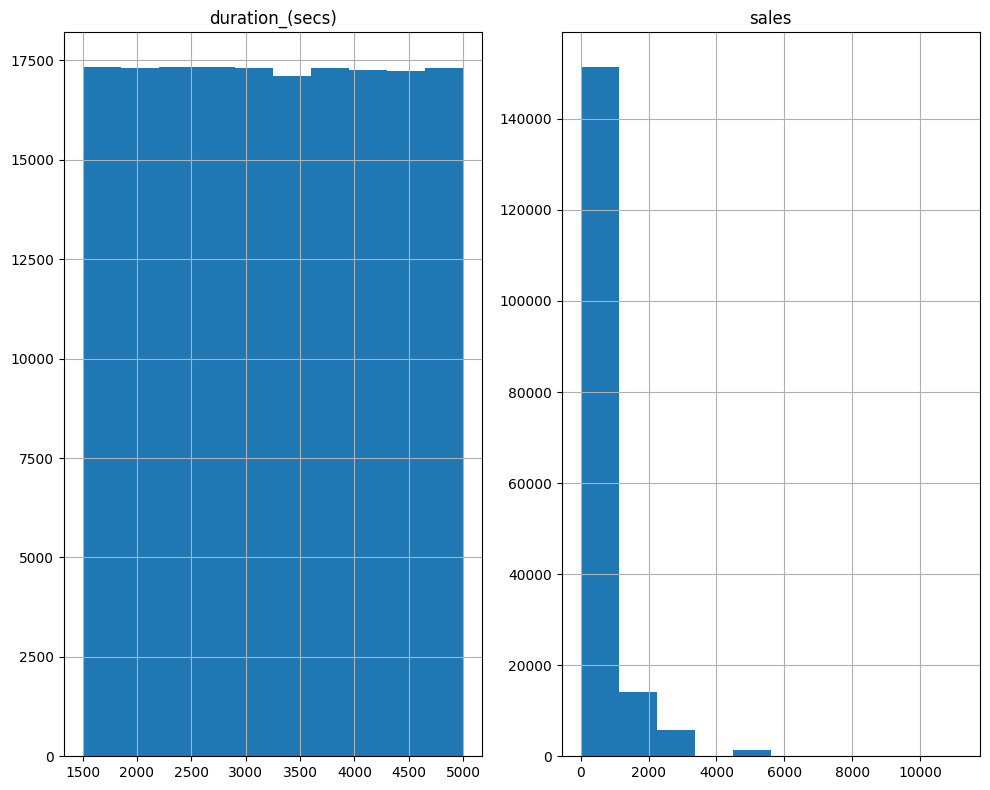

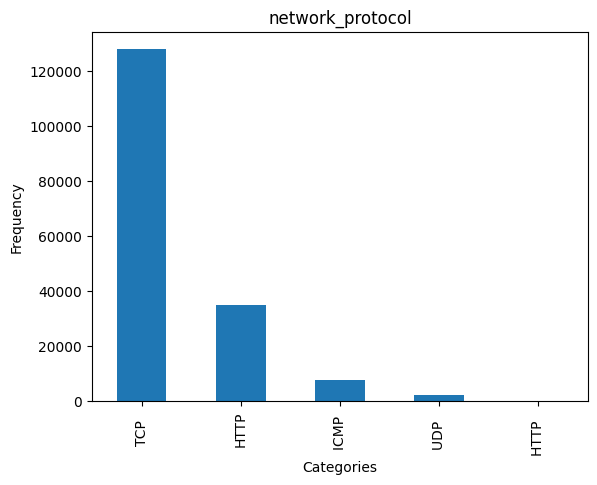

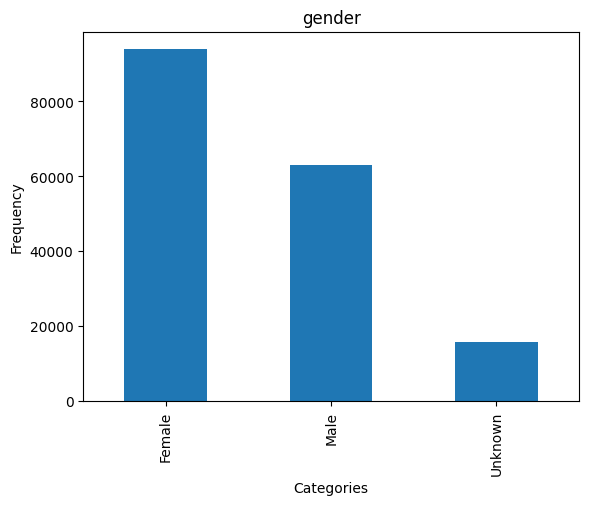

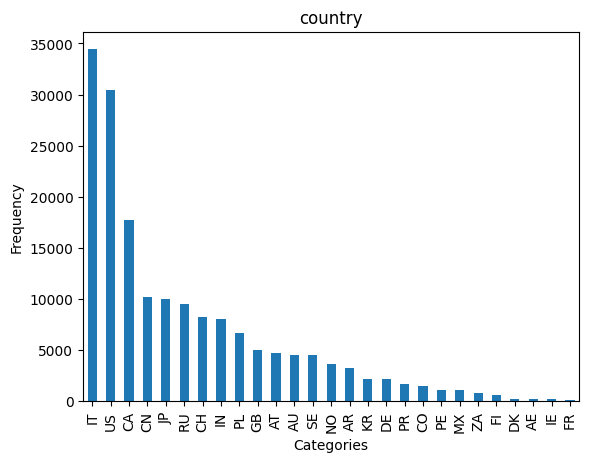

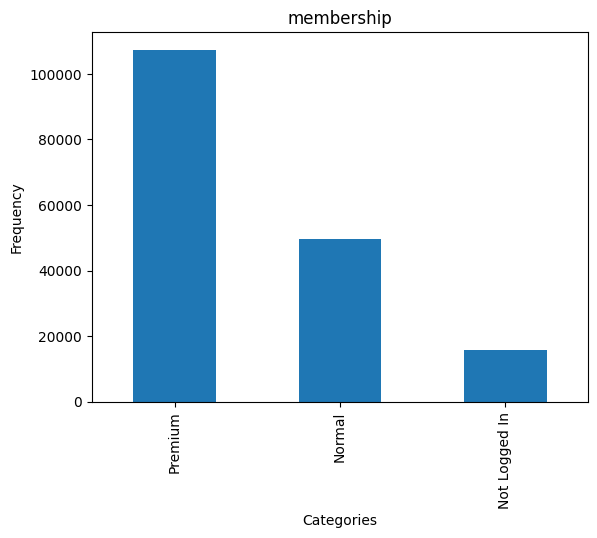

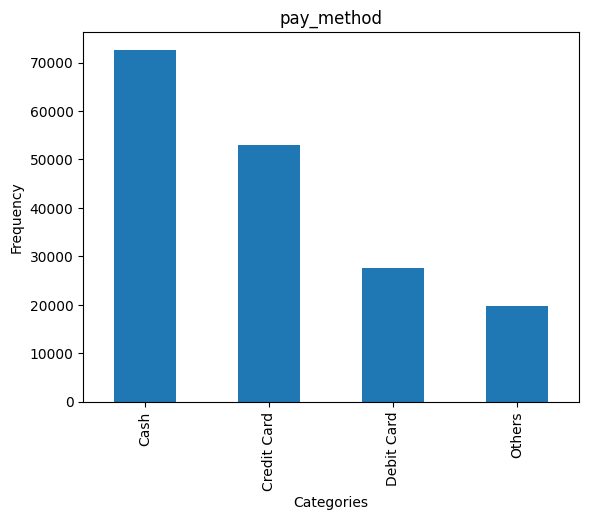

In [4]:
## Examine Variable Distributions
# Plot histograms for numerical variables
import pandas as pd
import matplotlib.pyplot as plt

numerical_vars = ['duration_(secs)','sales']
df[numerical_vars].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Create bar plots for categorical variables
categorical_vars = ['network_protocol','gender', 'country', 'membership', 'pay_method']
for var in categorical_vars:
    df[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()

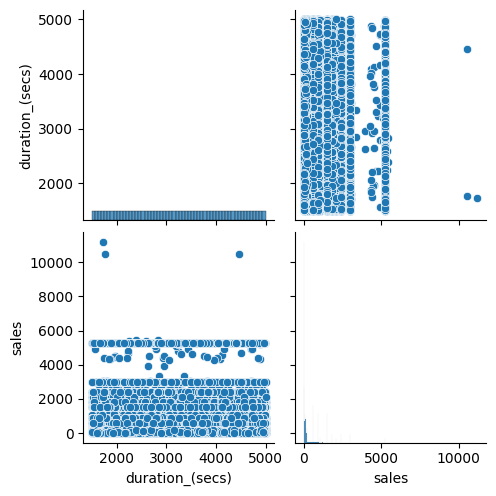

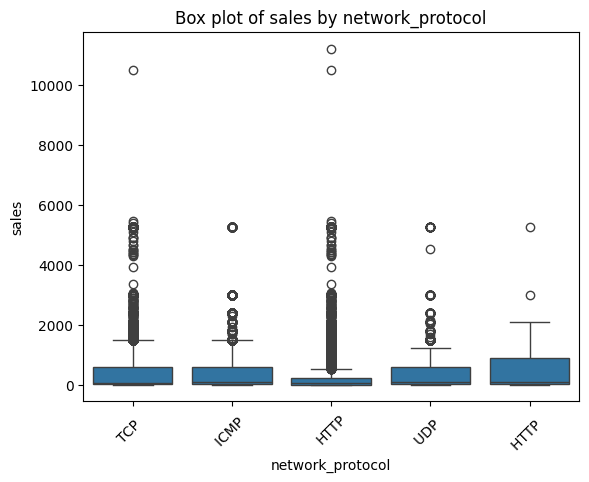

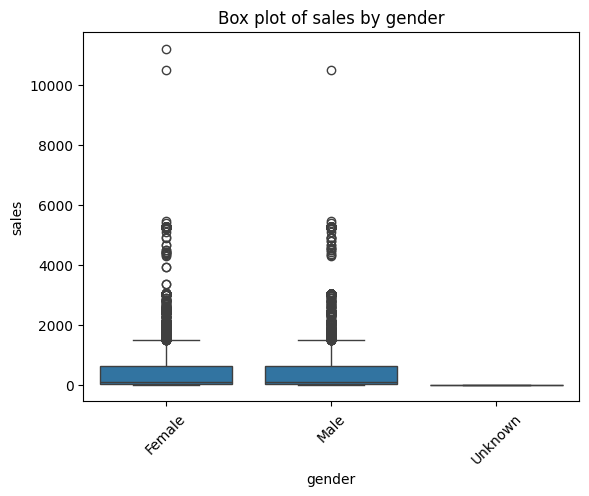

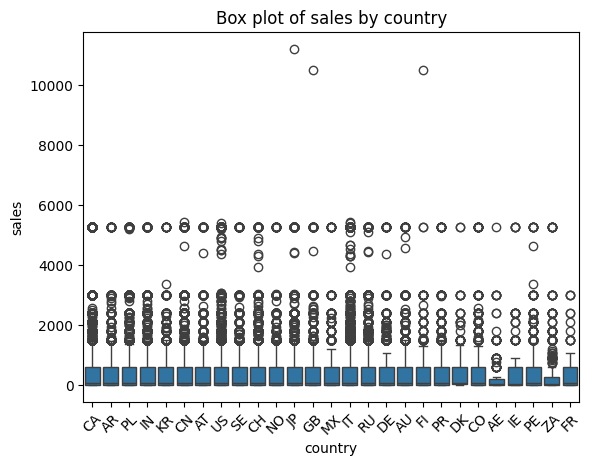

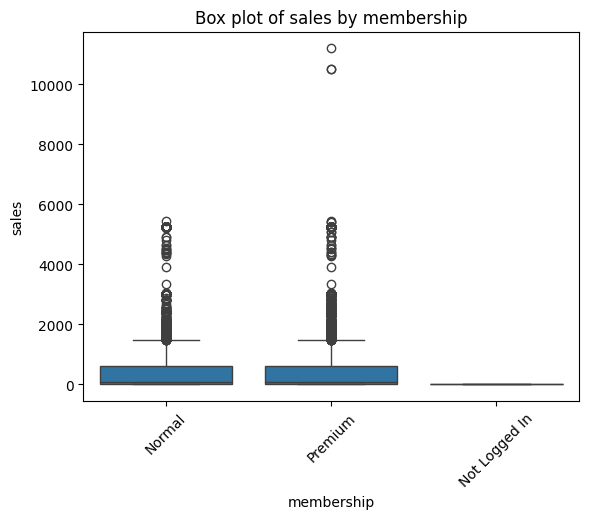

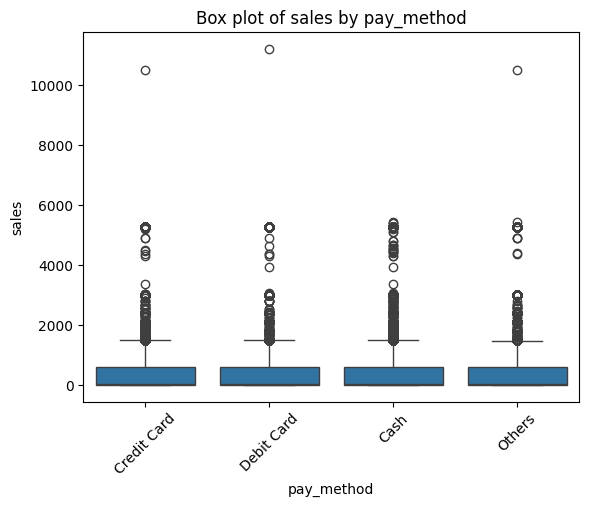

In [5]:
## Visualize Variable relationships 
import seaborn as sns

# Create pair plot for numerical variables
sns.pairplot(df[numerical_vars])
plt.show()

# Visualize relationships between numerical and categorical variables
for var in categorical_vars:
    sns.boxplot(x=var, y='sales', data=df)
    plt.title(f'Box plot of sales by {var}')
    plt.xticks(rotation=45)
    plt.show()

# 2.2 DATA PREPROCESSING

In [6]:
# Review current df after EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_(secs)   172838 non-null  int64  
 1   network_protocol  172838 non-null  object 
 2   gender            172838 non-null  object 
 3   country           172838 non-null  object 
 4   membership        172838 non-null  object 
 5   sales             172838 non-null  float64
 6   pay_method        172838 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 9.2+ MB


In [7]:
# Filter data to include only rows where the country is "US", sales < 5000, payment_method and durations
df_filtered = df[(df['country'] == 'US') & (df['sales'] < 5000)]

# List columns related to payment_method and durations
columns_to_remove = ['pay_method', 'duration_(secs)', 'country']

# Drop columns related to payment_method and durations
df_filtered = df_filtered.drop(columns=columns_to_remove)

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30167 entries, 8 to 172836
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   network_protocol  30167 non-null  object 
 1   gender            30167 non-null  object 
 2   membership        30167 non-null  object 
 3   sales             30167 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [9]:
#  Convert Categorical Variables:
df_encoded = pd.get_dummies(df_filtered, columns=['network_protocol', 'gender','membership'])

In [10]:
# Use StandardScaler to Normalize Numerical Features:
scaler = StandardScaler()
numerical_features = ['sales']  # Adjust this list as needed
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [11]:
# Create "Purchase_made" as the Binary Target:
df_encoded['Purchase_made'] = (df_encoded['sales'] > 0).astype(int)  # Convert boolean to integer (0 or 1)
# Drop the 'sales' column
df_encoded.drop(columns=['sales'], inplace=True)
y = df_encoded['Purchase_made']
X = df_encoded.drop(['Purchase_made'], axis=1)

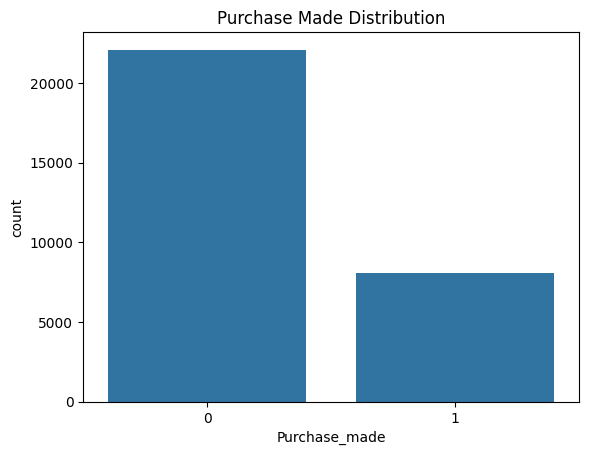

In [12]:
# Visualize any imbalance in the full dataset:
sns.countplot(x='Purchase_made', data=df_encoded)
plt.title('Purchase Made Distribution')
plt.show()

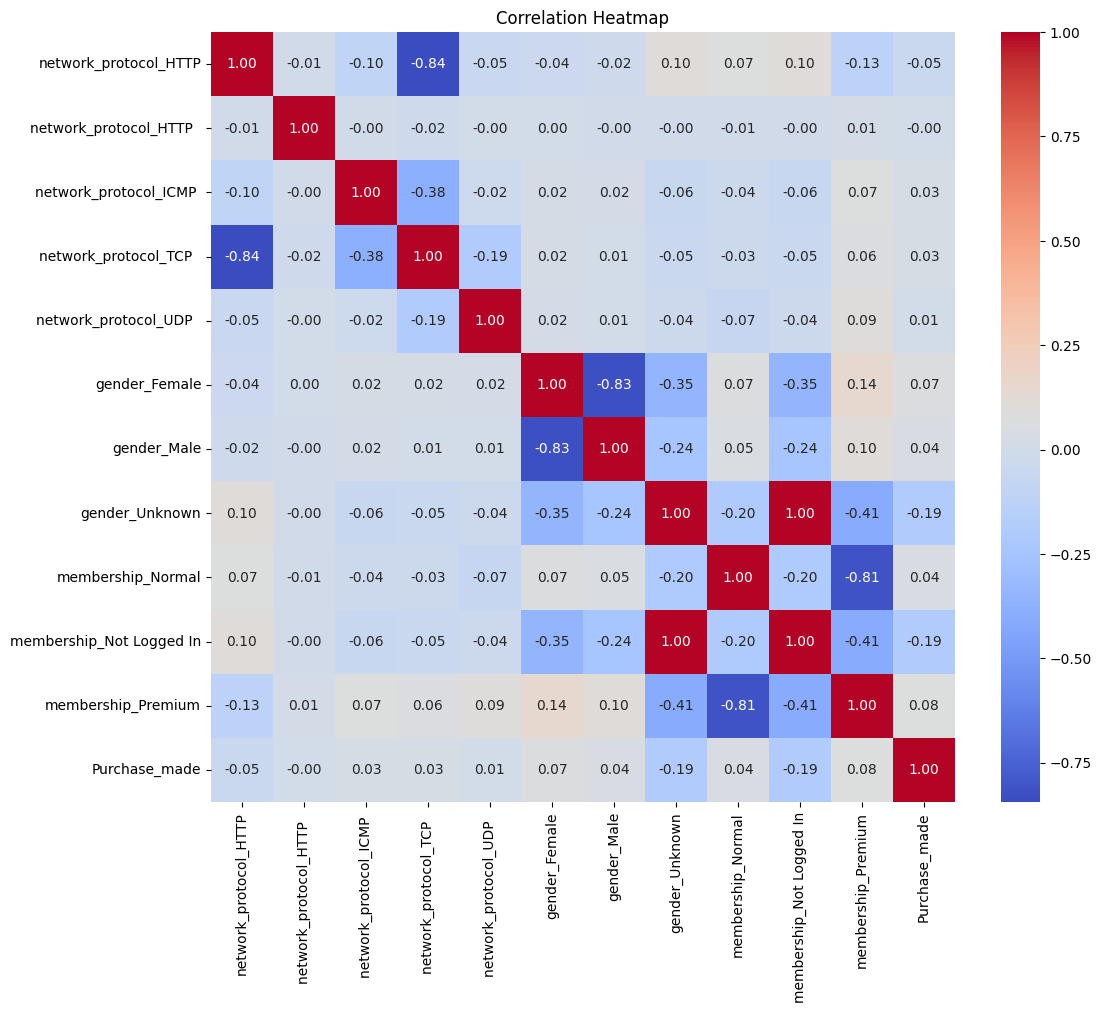

In [13]:
# Visualize correlation heatmap
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 2.3 FEATURE ENGINEERING

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [15]:
# Apply PCA
pca = PCA(n_components=0.95)  # Adjust the explained variance threshold as needed
X_pca = pca.fit_transform(X)
# Compare the dimensions of the transformed data
print("Original shape:", X.shape)
print("PCA transformed shape:", X_pca.shape)

Original shape: (30167, 11)
PCA transformed shape: (30167, 5)


In [16]:
#Split train/test for balanced training dataset:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Check class balance in training data
# Create a DataFrame to examine class distribution
train_df = pd.DataFrame({'Class': y_train})

# Count the number of samples for each class
class_distribution = train_df['Class'].value_counts()

# Print the class distribution
print("Class Distribution in Training Data:")
print(class_distribution)

# Check if the dataset is balanced
is_balanced = all(count == class_distribution.iloc[0] for count in class_distribution)
print("\nIs the Training Data Balanced?", is_balanced)

Class Distribution in Training Data:
Class
0    17673
1     6460
Name: count, dtype: int64

Is the Training Data Balanced? False


In [17]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Check class balance in resampled training data
# Create a DataFrame to examine class distribution
train_resampled_df = pd.DataFrame({'Class': y_train_resampled})

# Count the number of samples for each class
class_distribution_resampled = train_resampled_df['Class'].value_counts()

# Print the class distribution
print("Class Distribution in Resampled Training Data:")
print(class_distribution_resampled)

# Check if the dataset is balanced after resampling
is_balanced_resampled = all(count == class_distribution_resampled.iloc[0] for count in class_distribution_resampled)
print("\nIs the Resampled Training Data Balanced?", is_balanced_resampled)

Class Distribution in Resampled Training Data:
Class
0    17673
1    17673
Name: count, dtype: int64

Is the Resampled Training Data Balanced? True


## 2.4 MODEL TRAINING
Before we build our first model, What is the baseline performance that our classifier should aim to beat?

## 2.4.1 Baseline Model  DummyClassifier vs. Default LogisticRegression, KNN, Decision Tree, SVM, RandomForest

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Define classifiers
classifiers = {
    'Dummy Classifier': DummyClassifier(strategy='most_frequent'),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train_resampled, y_train_resampled)
    fit_time = time.time() - start_time

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'Fit Time (s)': fit_time}

# Print results
print("{:<20} {:<10} {:<10} {:<10} {:<10} {:<15}".format('Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Fit Time (s)'))
for name, result in results.items():
    print("{:<20} {:<10.3f} {:<10.3f} {:<10.3f} {:<10.3f} {:<15.3f}".format(name, 
                                                                             result['Accuracy'], 
                                                                             result['Precision'], 
                                                                             result['Recall'], 
                                                                             result['F1-score'], 
                                                                             result['Fit Time (s)']))

/Users/toandtran/anaconda3/envs/example1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classifier           Accuracy   Precision  Recall     F1-score   Fit Time (s)   
Dummy Classifier     0.732      0.000      0.000      0.000      0.005          
Logistic Regression  0.422      0.303      0.893      0.453      0.025          
KNN                  0.723      0.291      0.024      0.045      0.015          
SVM                  0.395      0.300      0.943      0.455      40.019         
Decision Tree        0.395      0.300      0.943      0.455      0.010          
Random Forest        0.395      0.300      0.943      0.455      0.718          


## 2.4.2 Find best parameters of Hyper Tunning with Cross Validation based on  F1-score 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Define hyperparameters grid for each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 5]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    'SVM': {'C': [0.1, 1, 5], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']},
    'Random Forest': {'n_estimators': [5, 10, 20], 'max_depth': [None, 10, 20, 30]}
}

# Define scorer for GridSearchCV based on F1-score
scorer = make_scorer(f1_score)

# Perform GridSearchCV and cross-validation
results = {}
for name, model in models.items():
    clf = GridSearchCV(model, param_grids[name], cv=5, scoring=scorer)
    clf.fit(X_train_resampled, y_train_resampled)
    results[name] = {'best_params': clf.best_params_, 'best_score': clf.best_score_}

# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best F1-score: {result['best_score']}")
    print("="*50)

## 2.4.3 Find best model based on Accuracy, Precision, F1, AUC-ROC over Hyper tunninand Cross Validation 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Define hyperparameters grid for each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 5]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'SVM': {'C': [0.1, 1, 5], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    'Random Forest': {'n_estimators': [5, 10, 20], 'max_depth': [None, 10, 20, 30]}
}

# Perform GridSearchCV and cross-validation
results = {}
for name, model in models.items():
    start_time = time.time()
    clf = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    clf.fit(X_train_resampled, y_train_resampled)
    fit_time = time.time() - start_time
    results[name] = {'best_params': clf.best_params_, 'fit_time': fit_time}

    # Evaluate model performance on test set
    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test)
    results[name]['accuracy'] = accuracy_score(y_test, y_pred)
    results[name]['precision'] = precision_score(y_test, y_pred)
    results[name]['recall'] = recall_score(y_test, y_pred)
    results[name]['f1_score'] = f1_score(y_test, y_pred)
    
    # Check if the model has predict_proba method (e.g., for SVM)
    if hasattr(best_model, 'predict_proba'):
        results[name]['auc_roc'] = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    else:
        results[name]['auc_roc'] = None

# Print results
print("{:<20} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format('Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'Fit Time (s)'))
for name, result in results.items():
    print("{:<20} {:<15.3f} {:<15.3f} {:<15.3f} {:<15.3f} {:<15.3f} {:<15.3f}".format(name, 
                                                                                        result['accuracy'], 
                                                                                        result['precision'], 
                                                                                        result['recall'], 
                                                                                        result['f1_score'], 
                                                                                        result['auc_roc'] if result['auc_roc'] is not None else np.nan, 
                                                                                        result['fit_time']))

## 2.4.3 Evaluation Matrics Summary 

Classifier               Accuracy   Precision  Recall     F1-score   Fit Time (s)   
Dummy Classifier          0.732      0.000      0.000      0.000      0.004          
Logistic Regression       0.422      0.303      0.893      0.453      0.023          
KNN                       0.723      0.291      0.024      0.045      0.014          
SVM                       0.395      0.300      0.943      0.455      39.767         
Decision Tree             0.395      0.300      0.943      0.455      0.010          
Random Forest             0.395      0.300      0.943      0.455      0.706 


# 3. Results 

## 3.1 Best Model choice for predicting the "purchase_made" or not. 

     . Since F1 score provides balanced measure of a classfier's performance 
         
     . Logistic Regression has the best F1-score (which is a harmonic of Preceision and relatively Recall.
    
     . LogisticRegression is the best choice for predicting the purchase_made or not.

## 3.2 Identify Key feature for Prediction Prolem listed in the order of importance 

     . network_protocol_TCP  : 3.83

     . network_protocol_HTTP

     . network_protocol_ICMP


In [ ]:
import numpy as np
# Initialize and fit a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

# Get feature importance
feature_importance = np.abs(log_reg.coef_[0])

# Sort feature importance in descending order
indices = np.argsort(feature_importance)[::-1]

# Print feature importance
print("Feature Importance:")
for i in indices:
    print(f"{X.columns[i]}: {feature_importance[i]}")

# Next Steps 

1. Consider "All countries"  because this study uses only US data which has 25% of the  original data sset( with all Conuntries)
2. Include "age" with removal of missing values. 
3. Consider polynomial feature engineering ( for nonlinear data ) rather than PCA which has been used in this study